## Put the directory of the package you want to analyze below: 


In [3]:
import os

# Create the "architecture details" folder in the current directory
current_dir = r"C:\Users\kinla\Documents\Random logging"
details_folder = os.path.join(current_dir, "architecture details")
os.makedirs(details_folder, exist_ok=True)

root_dir = r"C:\Users\kinla\Documents\All_github_repo\IC24Iteration1\Azure"
package = "huggingface"
full_dir = os.path.join(root_dir, package)

## 1. Print directory tree

This snippet will recursively print the content of the whole directory. 

Logfile backup strategy:
(A backup logfile will be automatically backup into `Documents/Logfile_software_engineering_toolbox` folder)

In [6]:
import os

# Paths
root_dir = r"C:\Users\kinla\Documents\All_github_repo\eurochina3\Agent 1 -Langchain, LangGraph"

In [7]:
import os
import datetime

# Get the current user's Documents directory
documents_dir = os.getenv('USERPROFILE') + r"\Documents"

# Logfile directory
log_dir = os.path.join("directory path",documents_dir, "Logfile_software_engineering_toolbox")

# Ensure the Logfile directory exists
os.makedirs(log_dir, exist_ok=True)

# Function to print directory tree
def print_tree(directory, indent=''):
    files = os.listdir(directory)
    files.sort()  # Sort files alphabetically
    tree_string = ""  # Variable to store the tree string

    for file in files:
        path = os.path.join(directory, file)
        if os.path.isfile(path):
            tree_string += f"{indent}|-- {file}\n"
        elif os.path.isdir(path):
            tree_string += f"{indent}|-- {file}/\n"
            tree_string += print_tree(path, indent + "|   ")

    return tree_string

# Generate the tree string
tree_string = print_tree(root_dir)

# Creating a logfile name with the folder name and timestamp
folder_name = os.path.basename(root_dir)
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
log_filename = f"{folder_name}_{timestamp}.txt"

# Full path for logfile
log_file_path = os.path.join(log_dir, log_filename)

# Save the tree string to the logfile in the specified directory
with open(log_file_path, "w") as file:
    file.write(tree_string)

# Print the tree string
print(tree_string)

|-- Part 1 - Setup/
|   |-- (Fail!!) setting up anyscale with LangGraph.ipynb
|   |-- (Success!!) setup anyscale with openai client.ipynb
|   |-- setting up anyscale with LangGraph.ipynb
|   |-- setup_langgraph.ipynb
|-- Part 2a Langchain skillsets/
|   |-- 00. Main components of langchain.ipynb
|   |-- 02b. Basic 1 - Runnable interface of langchain.ipynb
|   |-- 02c. Basic 2 - Online LLM APIs - Caching in langchain.ipynb
|   |-- 02d. Basic 3 - Online LLM APIs - Tracking token usage.ipynb
|   |-- 02e. Basic 4 - PromptTemplate.ipynb
|   |-- 02f. Basic 5 - FewShotPromptTemplate.ipynb
|   |-- 02g. Dynamical or conditional few-shot prompting.ipynb
|   |-- 03a. Retrieval 1 - List of items introduction.ipynb
|   |-- 03b. Retrieval 2 - Indexing.ipynb
|   |-- 03c. Retrieval 3 - Document loaders.ipynb
|   |-- 03d. Retrieval 4 - Text splitter.ipynb
|   |-- 03e. Retrieval 5 - Vector Store.ipynb
|   |-- 03f. Retrieval 6 - Retriever.ipynb
|   |-- 04a. RAG_chatbot (example from langchain official).i

## Second snippet - `pydeps` - Showing package dependency

#### Installation

- Install `graphviz`. Verify the installation by `dot -V` in the command prompt. 
- `pip install pydeps`

Syntax: 
- `pydeps .`: For all python script, generate dependency JSON and export it as SVG. 
- `pydeps xxx.py`: Generate dependency graph for a specific file. 

How `ptdeps` works: 
- `pydeps` only work on the directory that contain the package. 


step 1: Install graphviz: https://graphviz.org/download/

step 2: verify installation:
- restart powershell, type: `dot -version`

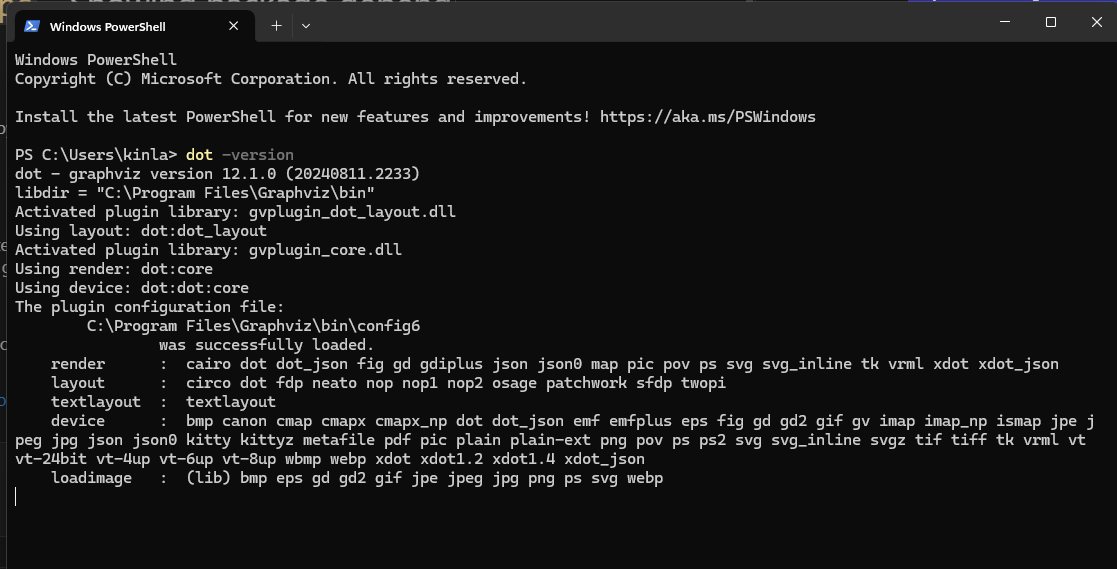

step 3: run something like: `pydeps C:\Python\Python312\Lib\site-packages\graphrag --noshow --max-bacon=2 -o graphrag.svg` to test pydeps. 

step 4: run it in python script: 

In [12]:
import os
import subprocess
import shutil
from IPython.display import SVG, display

# Specify the package name and directories
package = 'your_package_name'  # Set this to your target package name
full_dir = os.getcwd()
details_folder = 'path_to_details_folder'  # Set this to where you want to save the SVG

# Ensure the details_folder exists
if not os.path.exists(details_folder):
    os.makedirs(details_folder)

# Change directory 
os.chdir(full_dir)

# Execute command to create an SVG file of the dependencies
command = f'pydeps {package} --noshow --max-bacon=2 --output {package}.svg'
subprocess.run(command, shell=True, check=True)

# Define file paths
svg_file = os.path.join(full_dir, f'{package}.svg')
destination = os.path.join(details_folder, f'{package}.svg')

# Move the SVG file to the desired directory
shutil.move(svg_file, destination)

# Display the SVG image
display(SVG(filename=destination))


digraph G {
    concentrate = true;

    rankdir = TB;
    node [style=filled,fillcolor="#ffffff",fontcolor="#000000",fontname=Helvetica,fontsize=10];

}




FileNotFoundError: [WinError 2] The system cannot find the file specified

In [4]:
# print graph from dot file

import graphviz

graph = graphviz.Source(dot_file)
rendered_graph = graph.render(format='png')
display(graph)

In [13]:
import os
import subprocess
import shutil
import datetime
from IPython.display import SVG, display
import graphviz

# Paths
root_dir = os.getcwd()  # Use the current working directory as the root
package = 'your_package_name'  # Set this to your target package name

# Get the current user's Documents directory
# Logfile directory
# Ensure the Logfile directory exists
documents_dir = os.getenv('USERPROFILE') + r"\Documents"
log_dir = os.path.join(documents_dir, "Logfile_software_engineering_toolbox")
os.makedirs(log_dir, exist_ok=True)

# Specify the package name and directories
details_folder = os.path.join(root_dir, 'path_to_details_folder')  # Set this to where you want to save outputs

# Ensure the details_folder exists
if not os.path.exists(details_folder):
    os.makedirs(details_folder)

# Execute command to create an SVG file of the dependencies
command = f'pydeps {package} --noshow --max-bacon=2 --output {package}.svg'
subprocess.run(command, shell=True, check=True)

# Define file paths
svg_file = os.path.join(root_dir, f'{package}.svg')
destination = os.path.join(details_folder, f'{package}.svg')

# Move the SVG file to the desired directory
shutil.move(svg_file, destination)

# Display the SVG image
display(SVG(filename=destination))

# Creating a logfile name with the folder name and timestamp
folder_name = os.path.basename(root_dir)
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
log_filename = f"{folder_name}_{timestamp}.txt"

# Full path for logfile
log_file_path = os.path.join(log_dir, log_filename)

# Save SVG generation details to the logfile
log_details = f"SVG file for package '{package}' created on {timestamp} and moved to {destination}"
with open(log_file_path, "w") as file:
    file.write(log_details)

# Print log details to console
print(log_details)

CalledProcessError: Command 'pydeps your_package_name --noshow --max-bacon=2 --output your_package_name.svg' returned non-zero exit status 2.

## A dependency graph (as svg) will pop out 

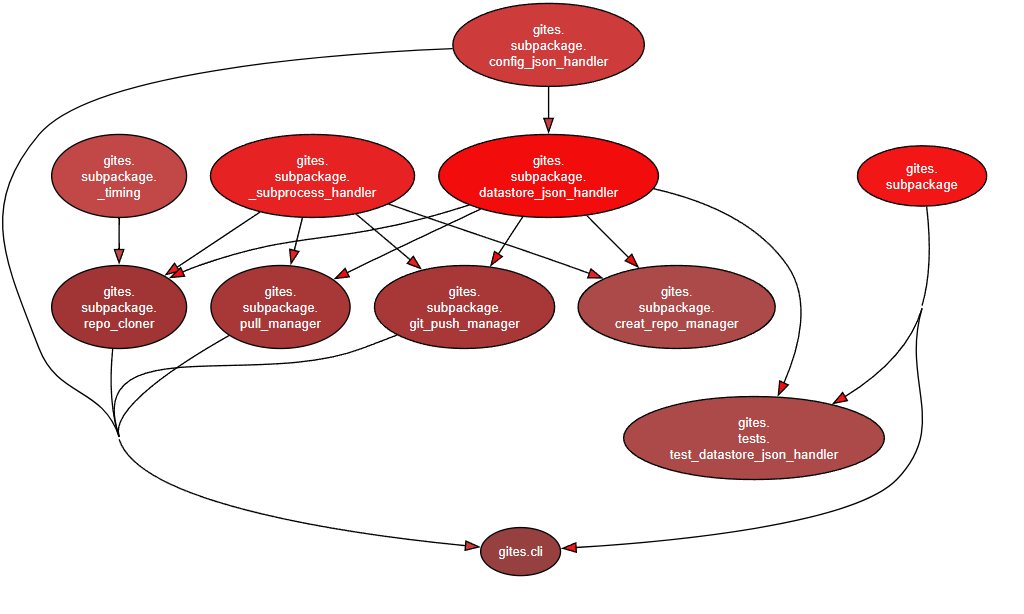

## Advanced dependency graph (Catch the dot file)

`pygraphviz`
- You need `Microsoft Visual C++ 14.0 or greater version` for this installation. 
- `pygraphviz` contains C++ extensions need to be compiled. 

Download VC++ Build tools, and install the following package (approximate 6GB):
- MSVC v142 - VS 2022 C++ x64/x86 build tool
- Windows 11 SDK
- C++ CMake tools for Windows

It can cause a lot of problem even in the stage of setting up `pygraphviz`. I do not recommend people doing this. 

## 3. UML Class and Package diagram 

In [5]:
import os
import subprocess
from subprocess import CalledProcessError
from IPython.display import Image, display

output_directory = details_folder

command = [
    "pyreverse",
    package,
    "-p", package,
    "-A",
    "-S",
    "-o", "png",
    "-d", output_directory  # New argument for specifying the output directory
]


try:
    # Execute the command using subprocess
    result = subprocess.run(command, cwd=full_dir, check=True)
except CalledProcessError as e:
    print(f"An error occurred while running pyreverse: {e}")
else:
    # Assuming the command was successful, display the images
    class_diagram_path = os.path.join(details_folder, f'classes_{package}.png')
    package_diagram_path = os.path.join(details_folder, f'packages_{package}.png')
    
    try:
        print("Class Diagram")
        display(Image(filename=class_diagram_path))
        print("Package Diagram")
        display(Image(filename=package_diagram_path))
    except FileNotFoundError as e:
        print(f"An error occurred while loading the diagrams: {e}")


An error occurred while running pyreverse: Command '['pyreverse', 'huggingface', '-p', 'huggingface', '-A', '-S', '-o', 'png', '-d', 'c:\\Users\\kinla\\Documents\\All_github_repo\\software_engineering_toolbox\\1. Package structure, Dependency, UML diagrams\\architecture details']' returned non-zero exit status 1.


## If we want to obtain the text file, we can use this script instead:

In [6]:
import os
import subprocess
from subprocess import CalledProcessError

def print_file_content(file_path):
    """
    Prints the content of the file at the given file path.
    """
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            file_content = f.read()
            print(f"File content ({file_path}):")
            print(file_content)
    else:
        print(f"The file does not exist: {file_path}")

command = [
    "pyreverse",
    package,
    "-p", package,
    "-A",
    "-S",
    "-o", "puml",
    "-d", output_directory  # New argument for specifying the output directory
]

try:
    # Execute the command using subprocess
    subprocess.run(command, cwd=full_dir, check=True)
except CalledProcessError as e:
    print(f"An error occurred while running pyreverse: {e}")
else:
    # Assuming the command was successful, construct the file paths
    class_puml_file_path = os.path.join(details_folder, f'classes_{package}.puml')
    packages_puml_file_path = os.path.join(details_folder, f'packages_{package}.puml')

    # Print the content of class_puml_file_path
    print_file_content(class_puml_file_path)

    # Print the content of packages_puml_file_path
    print_file_content(packages_puml_file_path)

An error occurred while running pyreverse: Command '['pyreverse', 'huggingface', '-p', 'huggingface', '-A', '-S', '-o', 'puml', '-d', 'c:\\Users\\kinla\\Documents\\All_github_repo\\software_engineering_toolbox\\1. Package structure, Dependency, UML diagrams\\architecture details']' returned non-zero exit status 1.
